In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_treated.pkl'))
df.head()

,correcao_licao_casa,faz_licao_casa,pai_le,pretensao_futura,reprovacao,tempo_trabalho_domestico,possui_tv,pai_sabe_ler_escrever,frequenta_espetaculo_exposicao,desempenho_aluno,...,utiliza_biblioteca_escola,responsaveis_comparecem_reuniao_pais,escola_publica,inicio_estudos,gosta_estudar_disciplina,leitura_historia_quadrinhos,frequenta_cinema,responsaveis_incentivam_comparecer_aulas,disciplina,desempenho_aluno_cat
8086,2.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,Proficiente,...,0.0,0.0,1,2.0,1.0,0.0,0.0,0.0,LP,2
10602,2.0,2.0,1.0,0.0,1.0,1.0,NaN,1.0,NaN,Insuficiente,...,2.0,2.0,1,1.0,1.0,2.0,2.0,1.0,LP,0
13975,2.0,2.0,1.0,0.0,1.0,1.0,NaN,1.0,NaN,Insuficiente,...,2.0,2.0,1,1.0,1.0,2.0,2.0,1.0,MT,0
17847,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,Insuficiente,...,0.0,1.0,1,1.0,1.0,2.0,NaN,1.0,MT,0
20664,2.0,1.0,NaN,0.0,1.0,2.0,2.0,1.0,0.0,Insuficiente,...,1.0,2.0,1,0.0,0.0,2.0,0.0,1.0,MT,0


In [30]:
# valores unicos para cada variável, menos as de exclude
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

for col in df.columns:
    if col not in exclude:
        print(f'{col}: {df[col].unique()}')

correcao_licao_casa: [ 2.  1. nan  0.]
faz_licao_casa: [ 2.  1.  0. nan]
pai_le: [ 0.  1. nan]
pretensao_futura: [ 0.  2.  3.  1. nan]
reprovacao: [ 0.  1.  2. nan]
tempo_trabalho_domestico: [ 4.  1.  0.  2.  3. nan]
possui_tv: [ 2. nan  1.  0.  3.  4.]
pai_sabe_ler_escrever: [ 0.  1. nan]
frequenta_espetaculo_exposicao: [ 1. nan  0.  2.]
leitura_revista_comportamento: [ 0.  2. nan  1.]
possui_computador: [ 1. nan  0.  2.  3.  4.]
responsaveis_conversam_escola: [ 0.  1. nan]
leitura_jornais: [ 0.  2. nan  1.]
responsaveis_incentivam_leitura: [ 0.  1. nan]
escolaridade_pai: [ 0.  3.  1.  2.  4.  5. nan]
frequenta_biblioteca: [ 0. nan  1.  2.]
evasao_escolar_ate_final_ano: [2 0 1 3]
leitura_revistas_geral: [ 0.  2. nan  1.]
responsaveis_incentivam_realizacao_licao_casa: [ 0.  1. nan]
mae_le: [ 0. nan  1.]
idade: [15 13 14 16 17 18 21 20 19]
responsaveis_incentivam_estudos: [ 0.  1. nan]
possui_trabalho: [ 0.  1. nan]
mae_sabe_ler_escrever: [ 1. nan  0.]
leitura_internet: [ 2. nan  1.  0.

<AxesSubplot: >

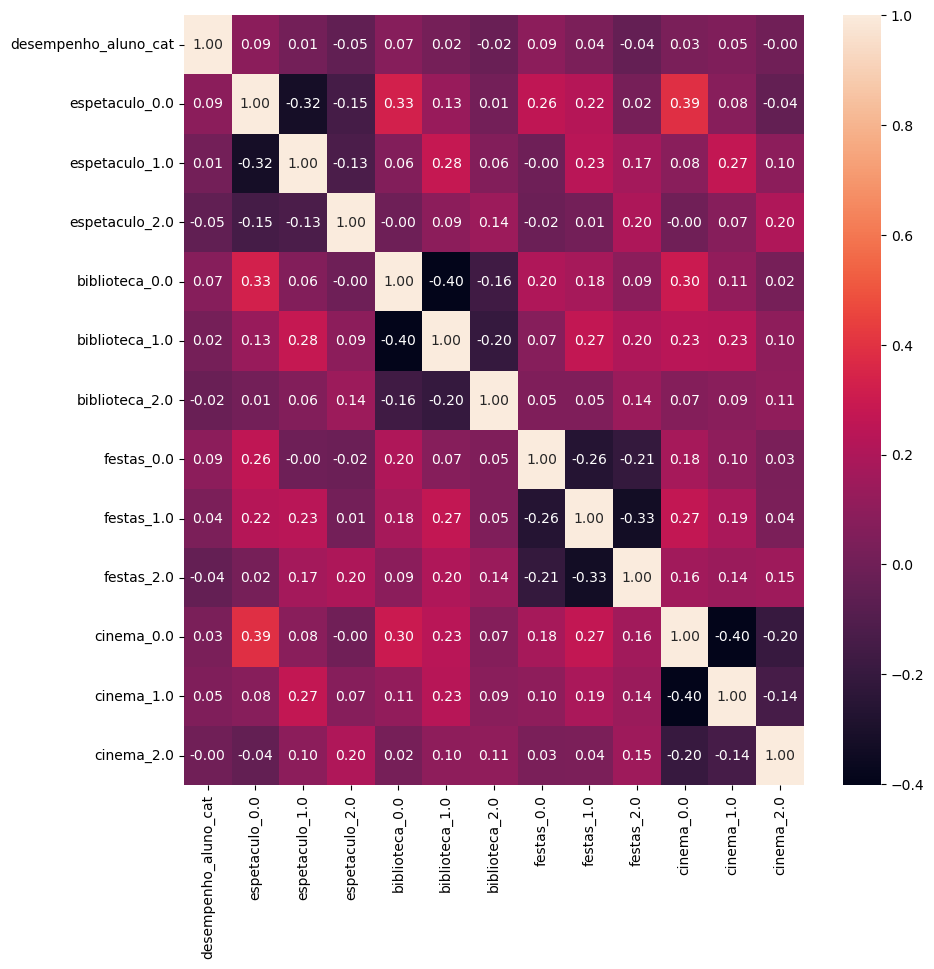

In [31]:
# colunas 'frequenta'
# aplicando onehotencoder
columns_oi = [col for col in df.columns if 'frequenta' in col] + ['desempenho_aluno_cat']

df_frequenta = df[columns_oi]
# renomeando colunas para remover 'frequenta'
df_frequenta.columns = [col.split('_')[1] for col in df_frequenta.columns if 'frequenta_' in col] + ['desempenho_aluno_cat']

# adicionando colunas com onehotencoder, mas sem aplicar em 'desempenho_aluno_cat'
df_frequenta = pd.get_dummies(df_frequenta, columns=[col for col in df_frequenta.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_frequenta.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

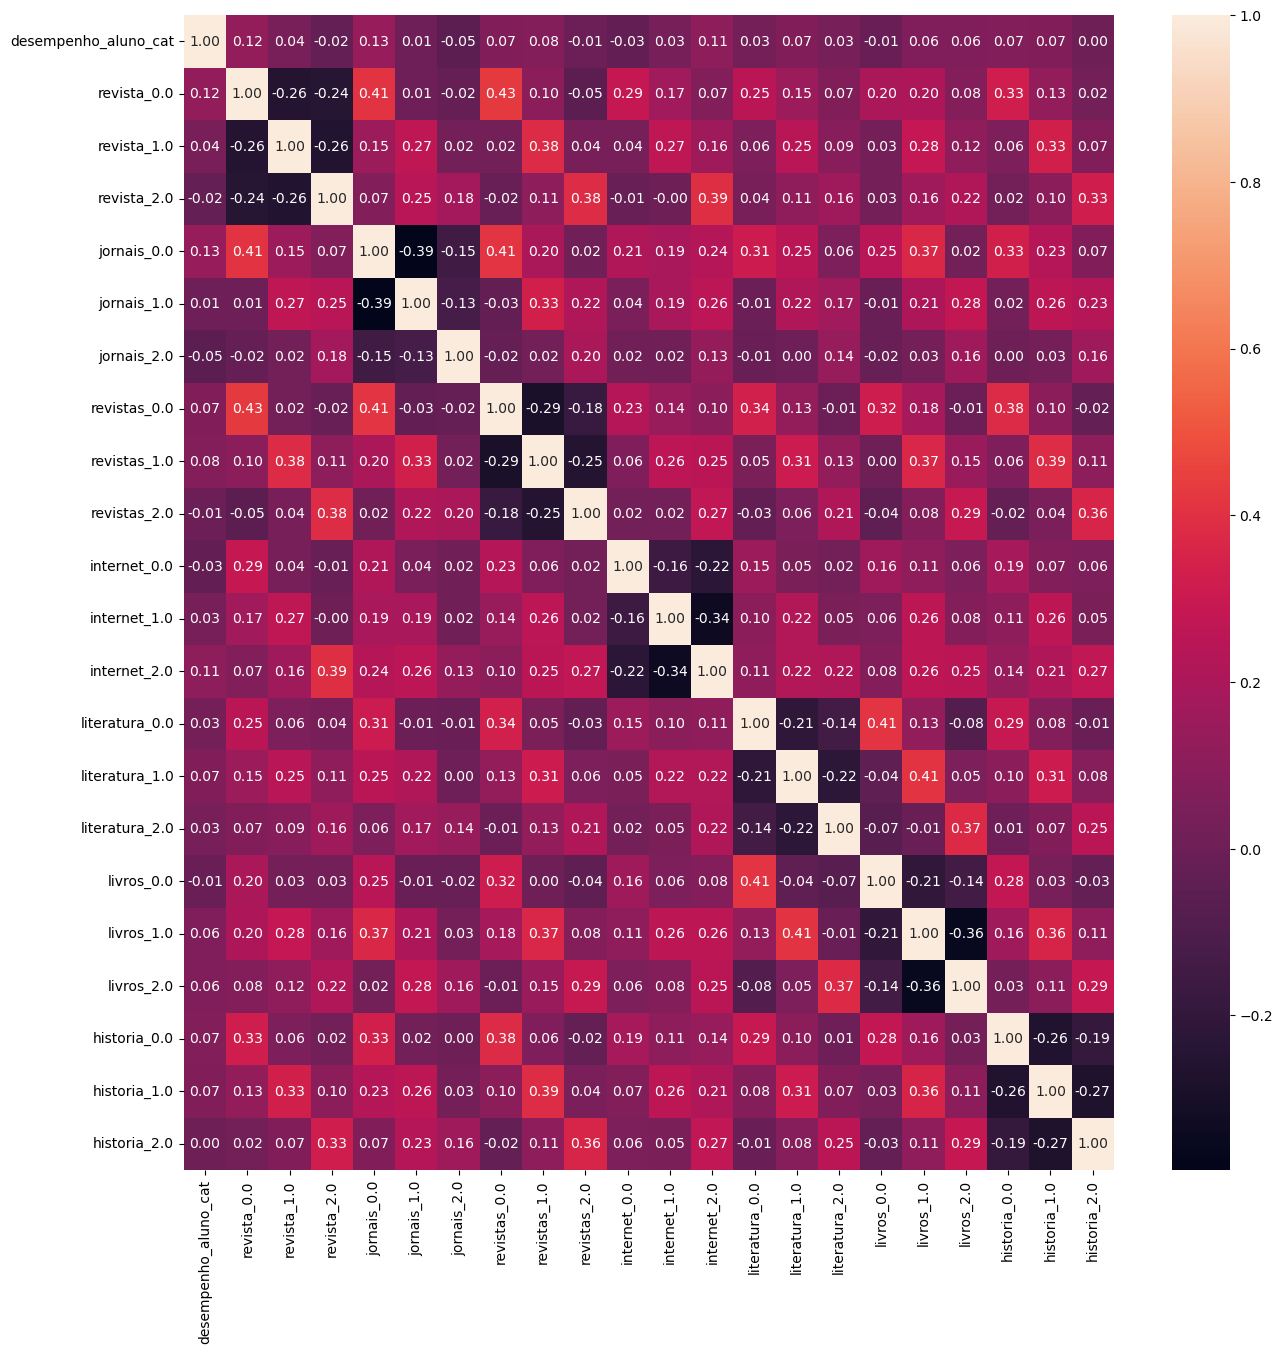

In [32]:
#  variaveis leitura, usando dummies

columns_oi = [col for col in df.columns if 'leitura_' in col] + ['desempenho_aluno_cat']

df_leitura = df[columns_oi]

df_leitura.columns = [col.split('_')[1] for col in df_leitura.columns if 'leitura_' in col] + ['desempenho_aluno_cat']

df_leitura = pd.get_dummies(df_leitura, columns=[col for col in df_leitura.columns if col != 'desempenho_aluno_cat'])
#print(df_leitura.sample(1))

# visualizando correlação com matriz de confusão
correlation = df_leitura.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

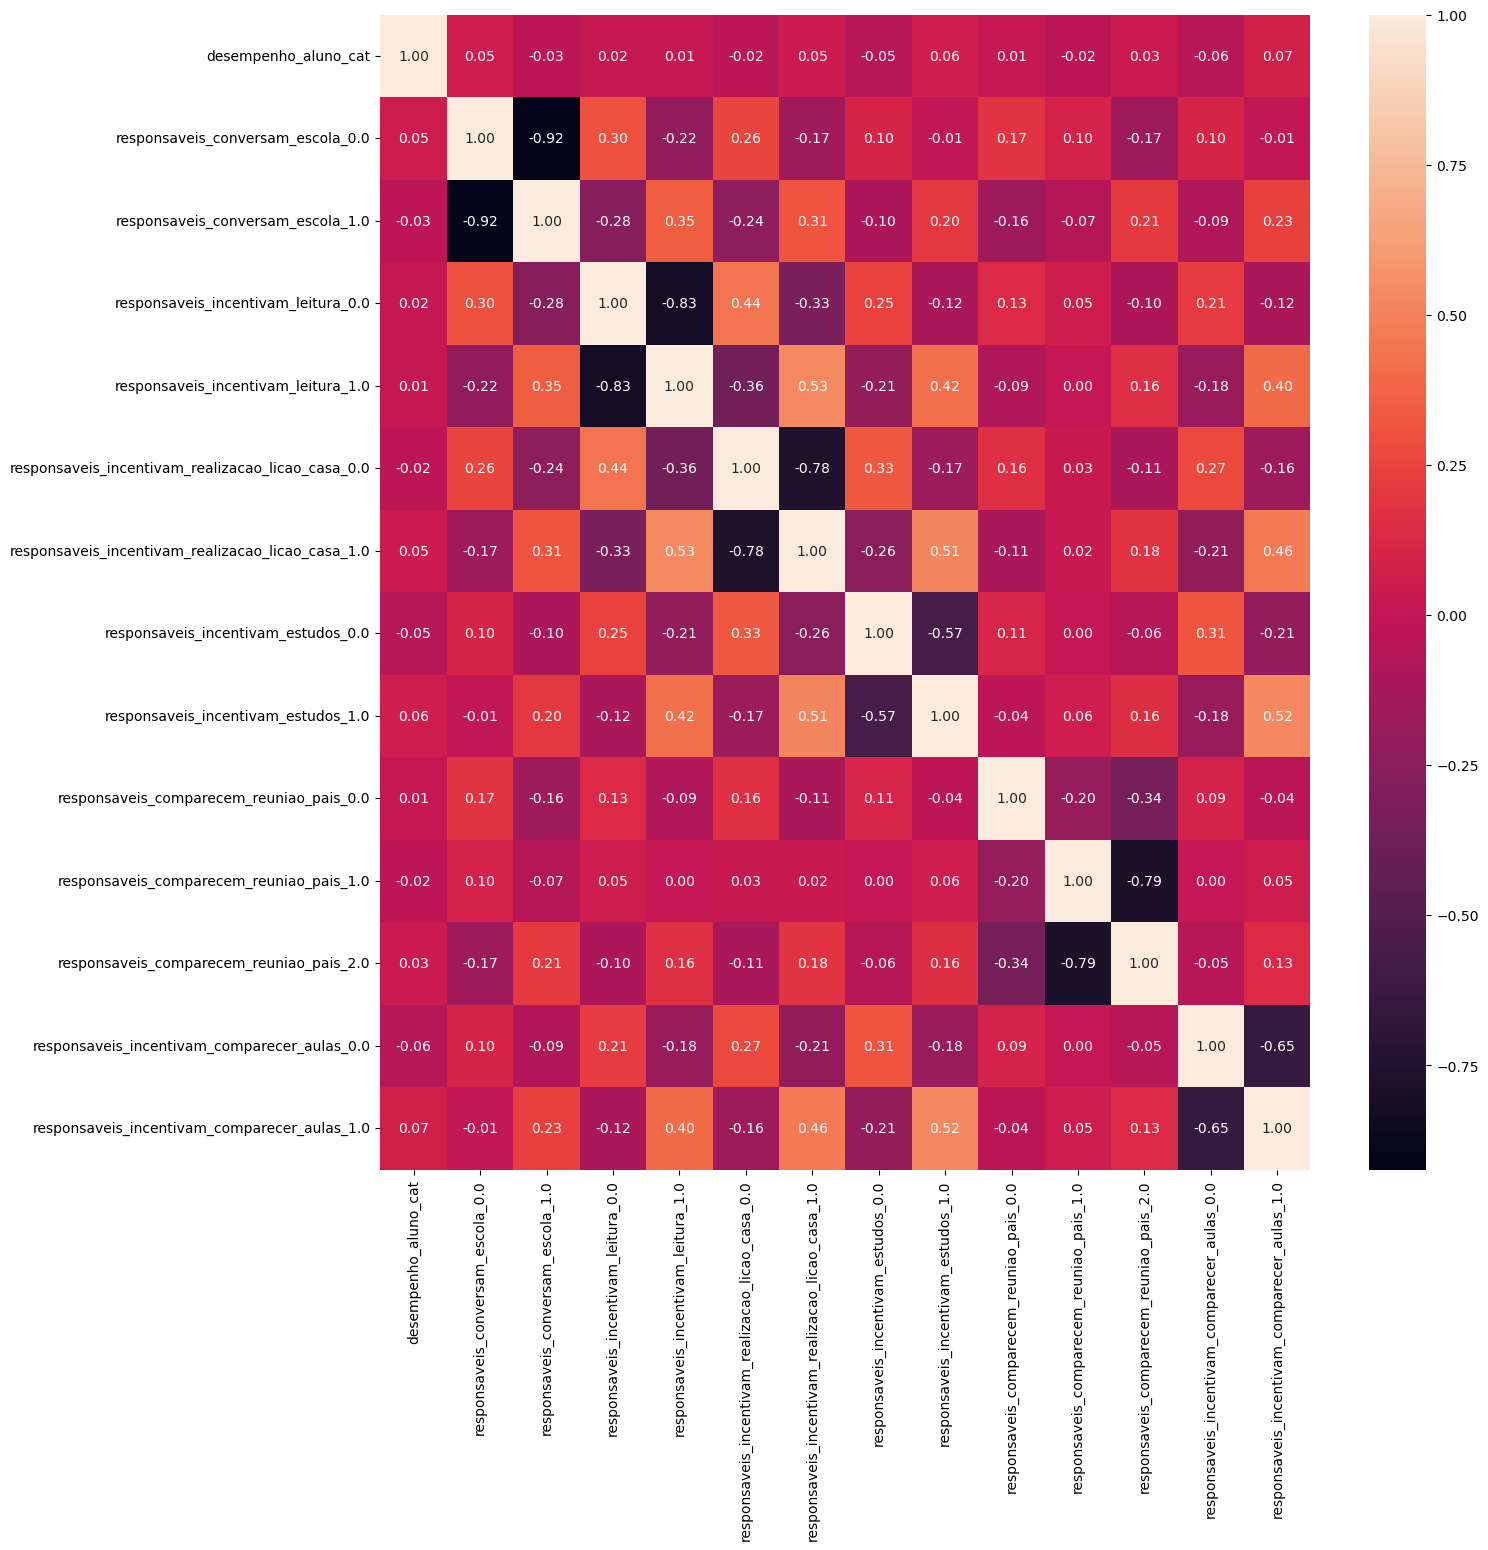

In [33]:
# variaveis responsavel
columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['desempenho_aluno_cat']

df_responsaveis = df[columns_oi]

#df_responsaveis.columns = [col.split('_')[1] for col in df_responsaveis.columns if 'responsaveis_' in col] + ['desempenho_aluno_cat']

df_responsaveis = pd.get_dummies(df_responsaveis, columns=[col for col in df_responsaveis.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_responsaveis.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

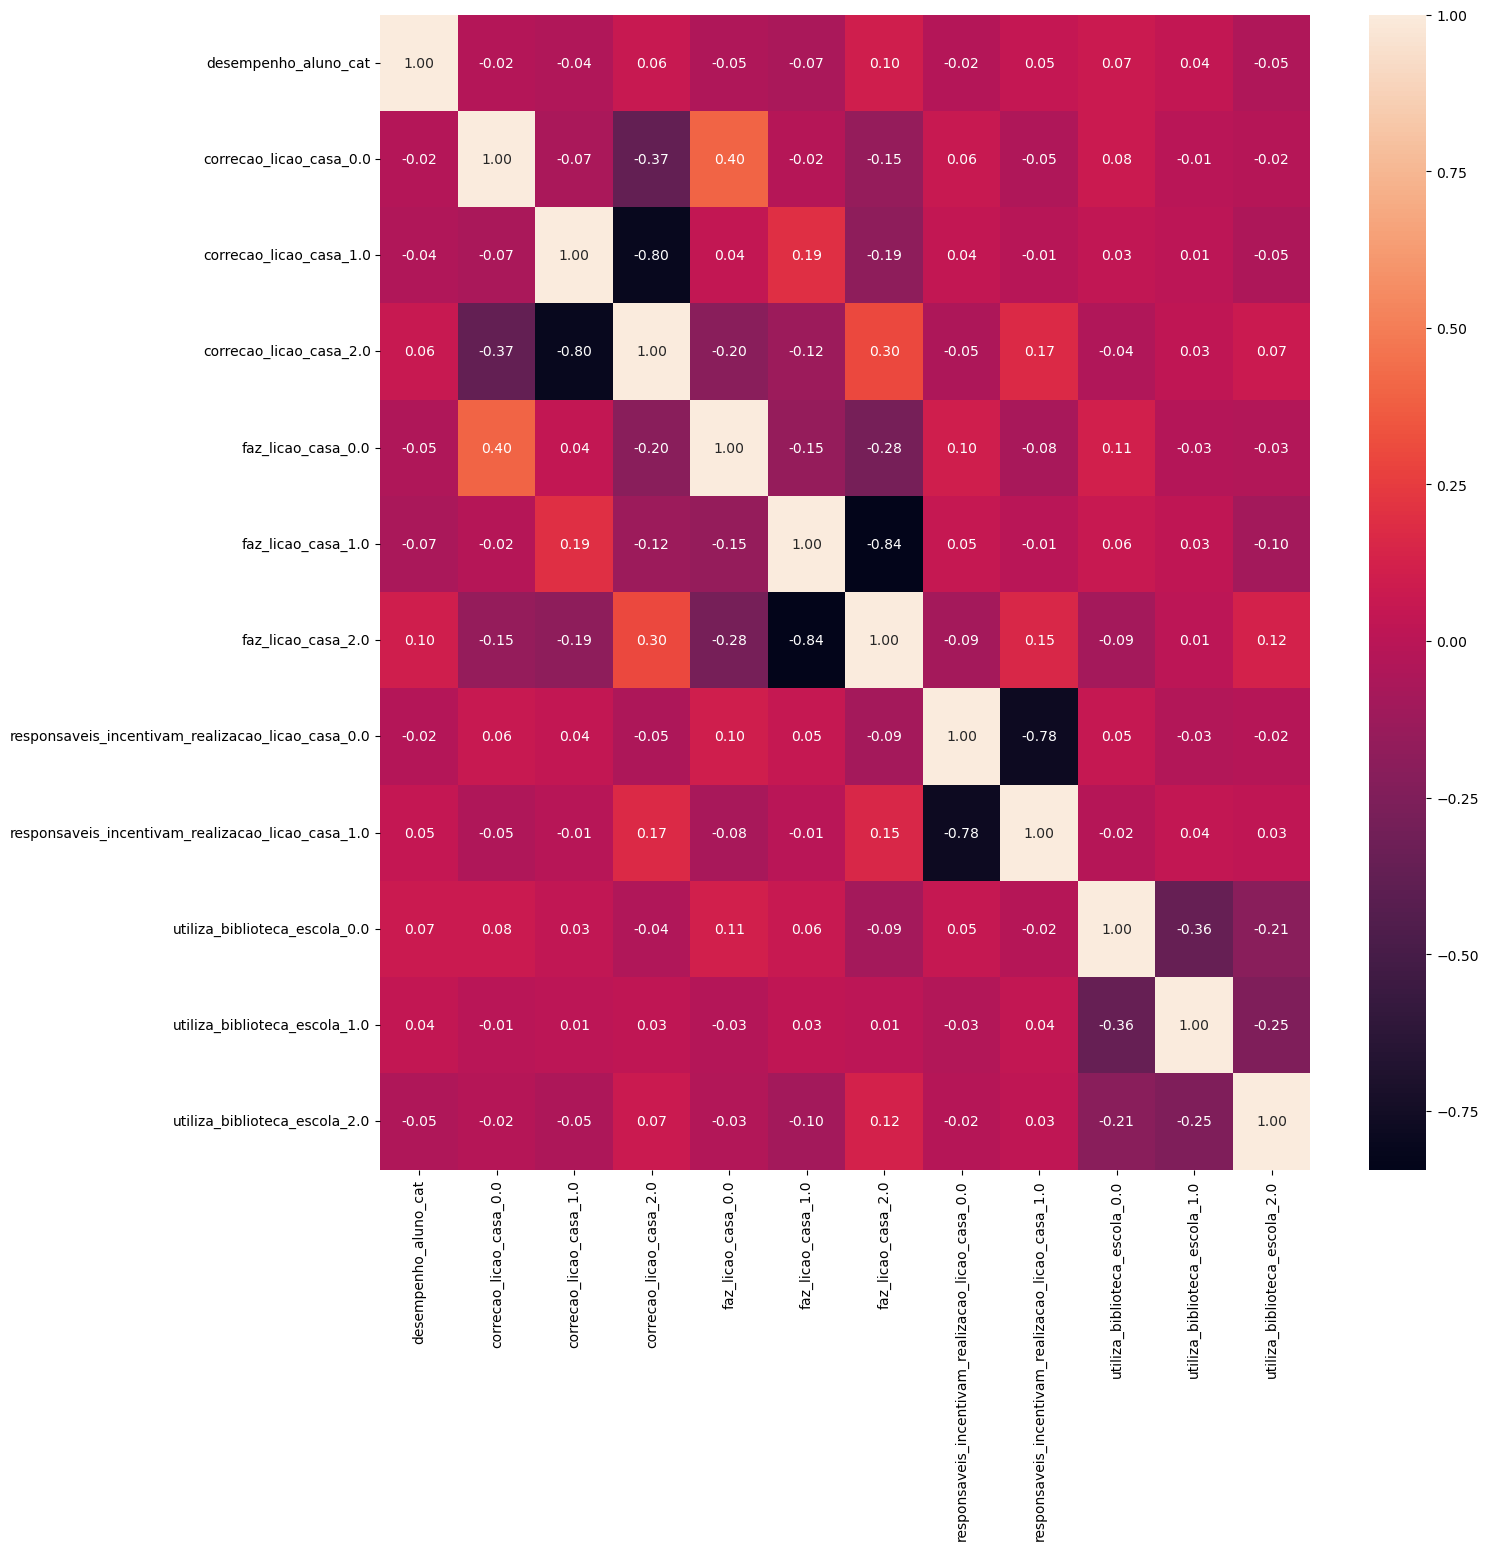

In [34]:
# licao de casa

columns_oi = [col for col in df.columns if 'licao' in col] + ['utiliza_biblioteca_escola'] + ['desempenho_aluno_cat']

df_licao = df[columns_oi]

df_licao = pd.get_dummies(df_licao, columns=[col for col in df_licao.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_licao.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

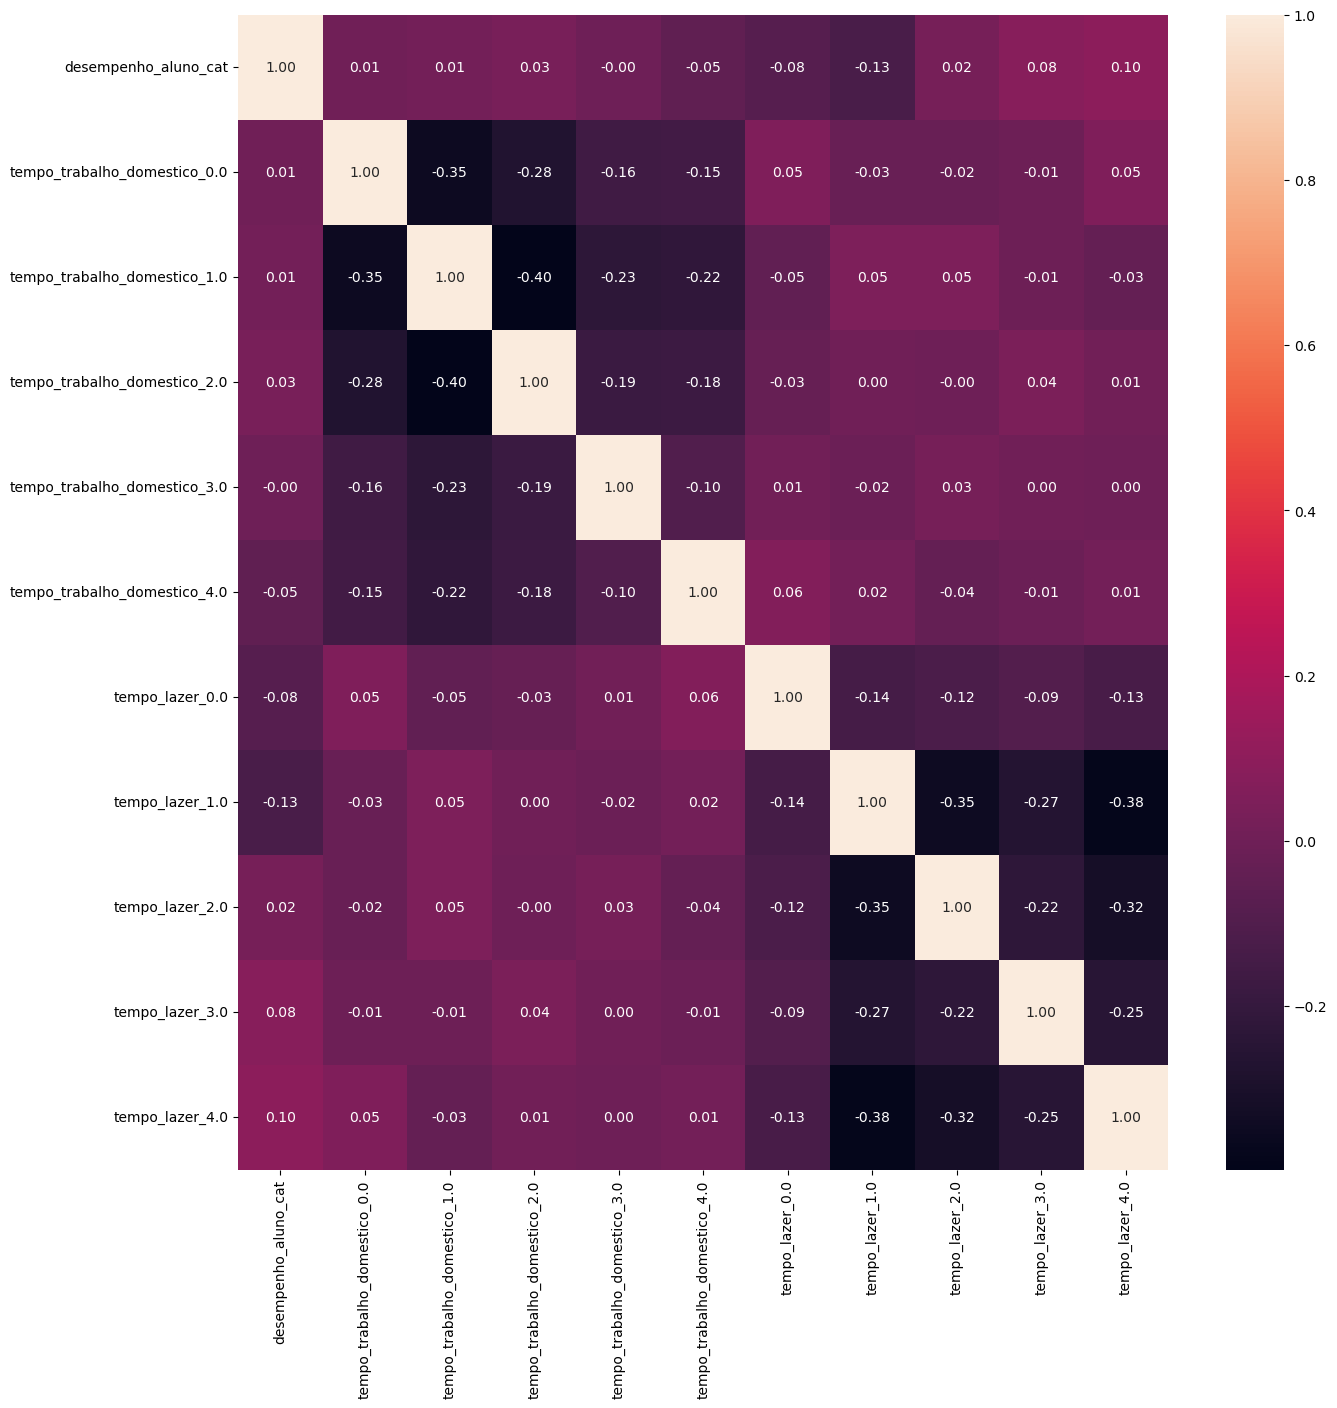

In [35]:
# tempo gasto com lazer / trabalho doméstico

columns_oi = [col for col in df.columns if 'tempo' in col] + ['desempenho_aluno_cat']

df_tempo = df[columns_oi]

df_tempo = pd.get_dummies(df_tempo, columns=[col for col in df_tempo.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_tempo.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

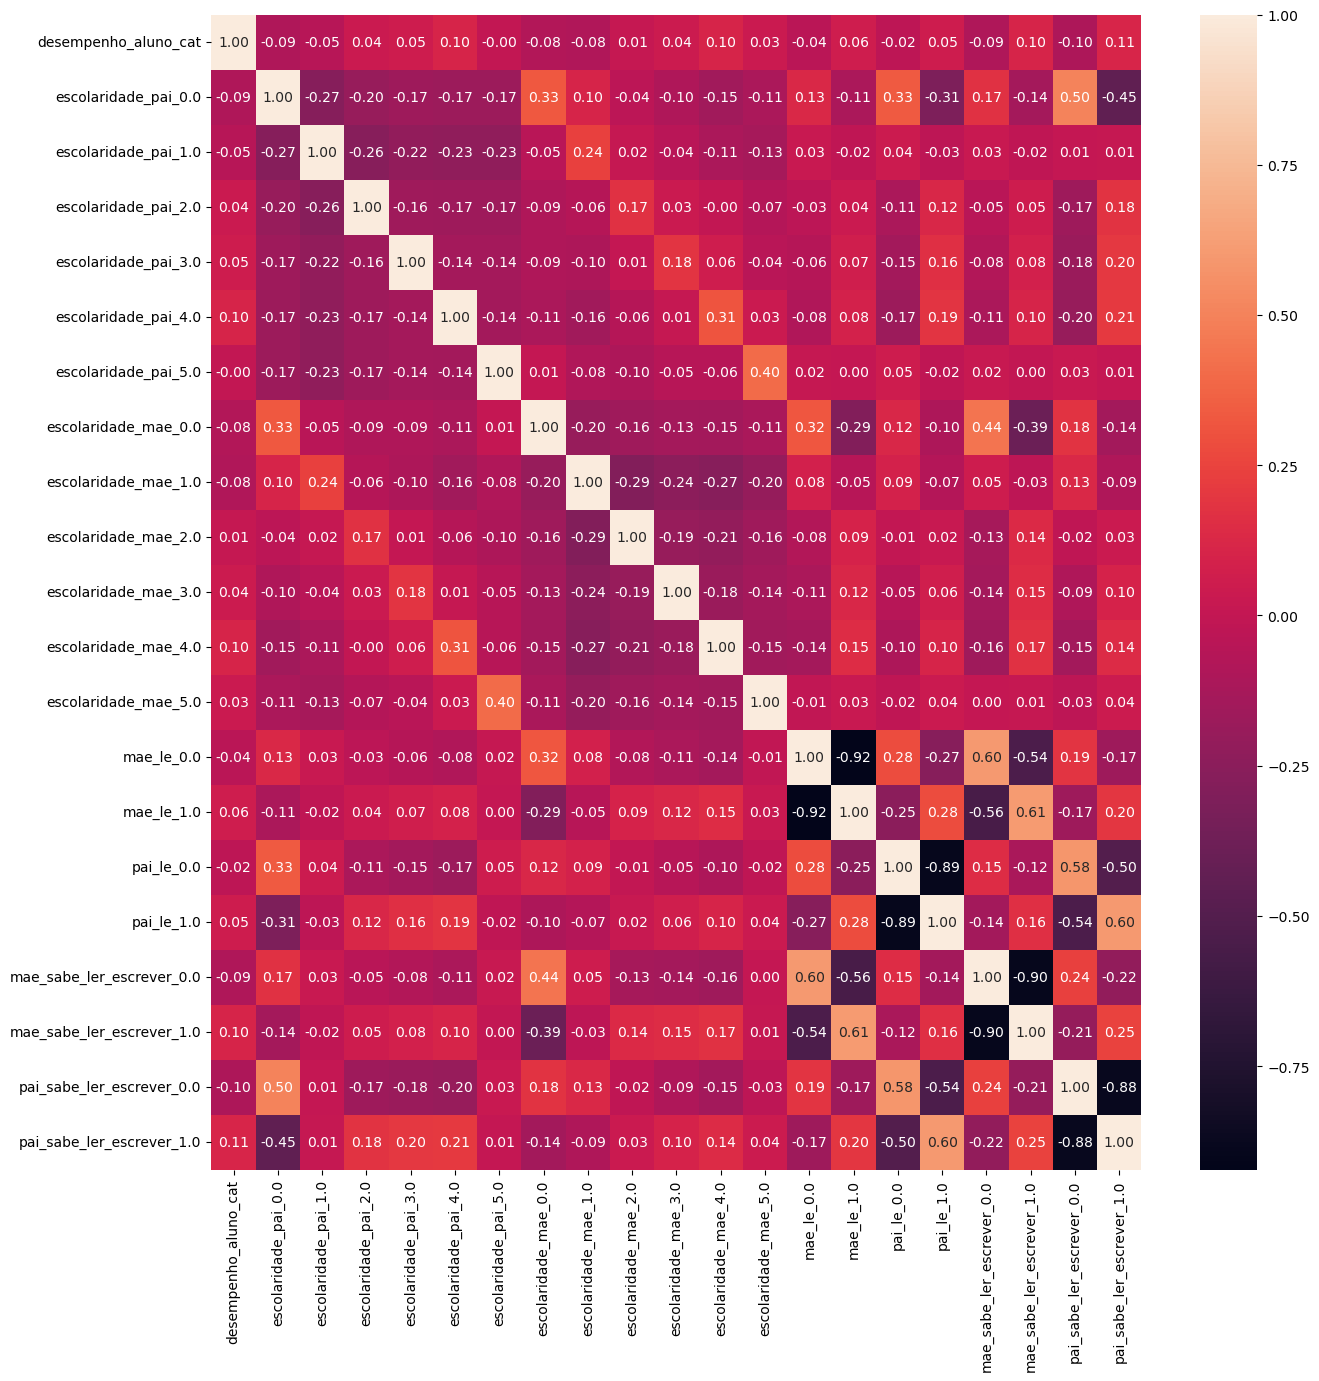

In [36]:
# escolaridade dos pais

columns_oi = [col for col in df.columns if 'escolaridade_' in col] + ['mae_le', 'pai_le', 'mae_sabe_ler_escrever', 'pai_sabe_ler_escrever'] + ['desempenho_aluno_cat']

df_escolaridade = df[columns_oi]

df_escolaridade = pd.get_dummies(df_escolaridade, columns=[col for col in df_escolaridade.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_escolaridade.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

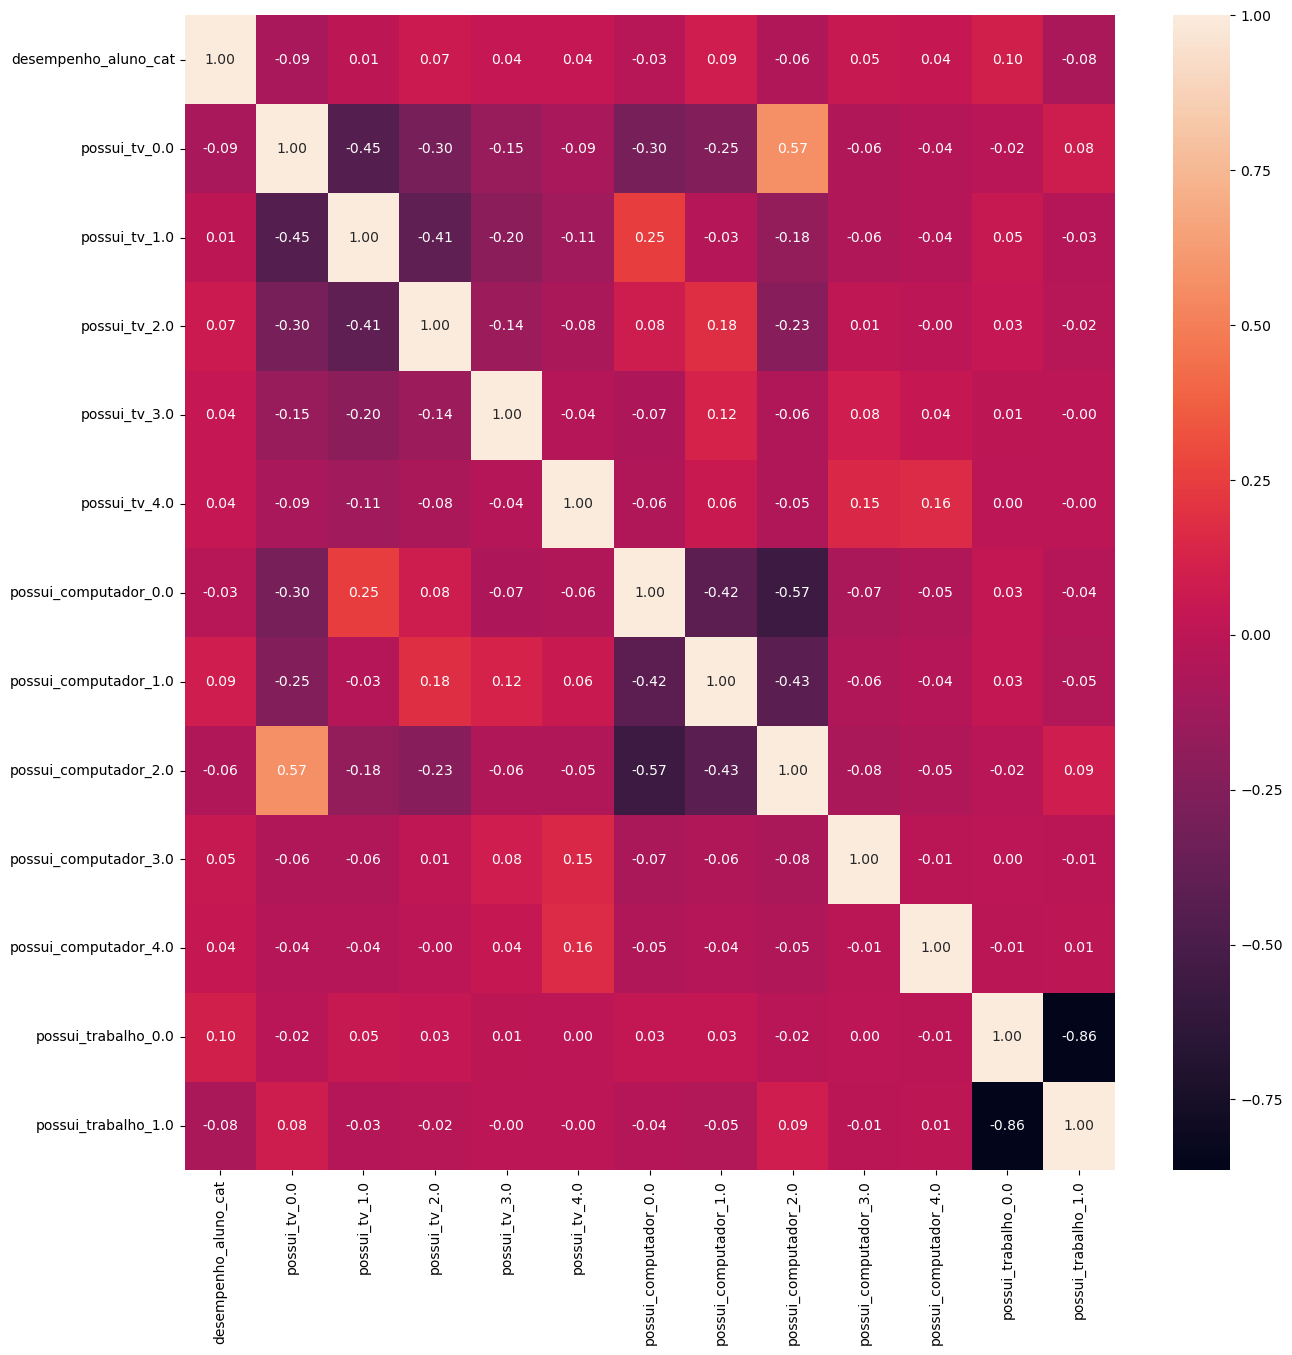

In [37]:
# questões 'possui'

columns_oi = [col for col in df.columns if 'possui' in col] + ['desempenho_aluno_cat']

df_possui = df[columns_oi]

df_possui = pd.get_dummies(df_possui, columns=[col for col in df_possui.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_possui.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

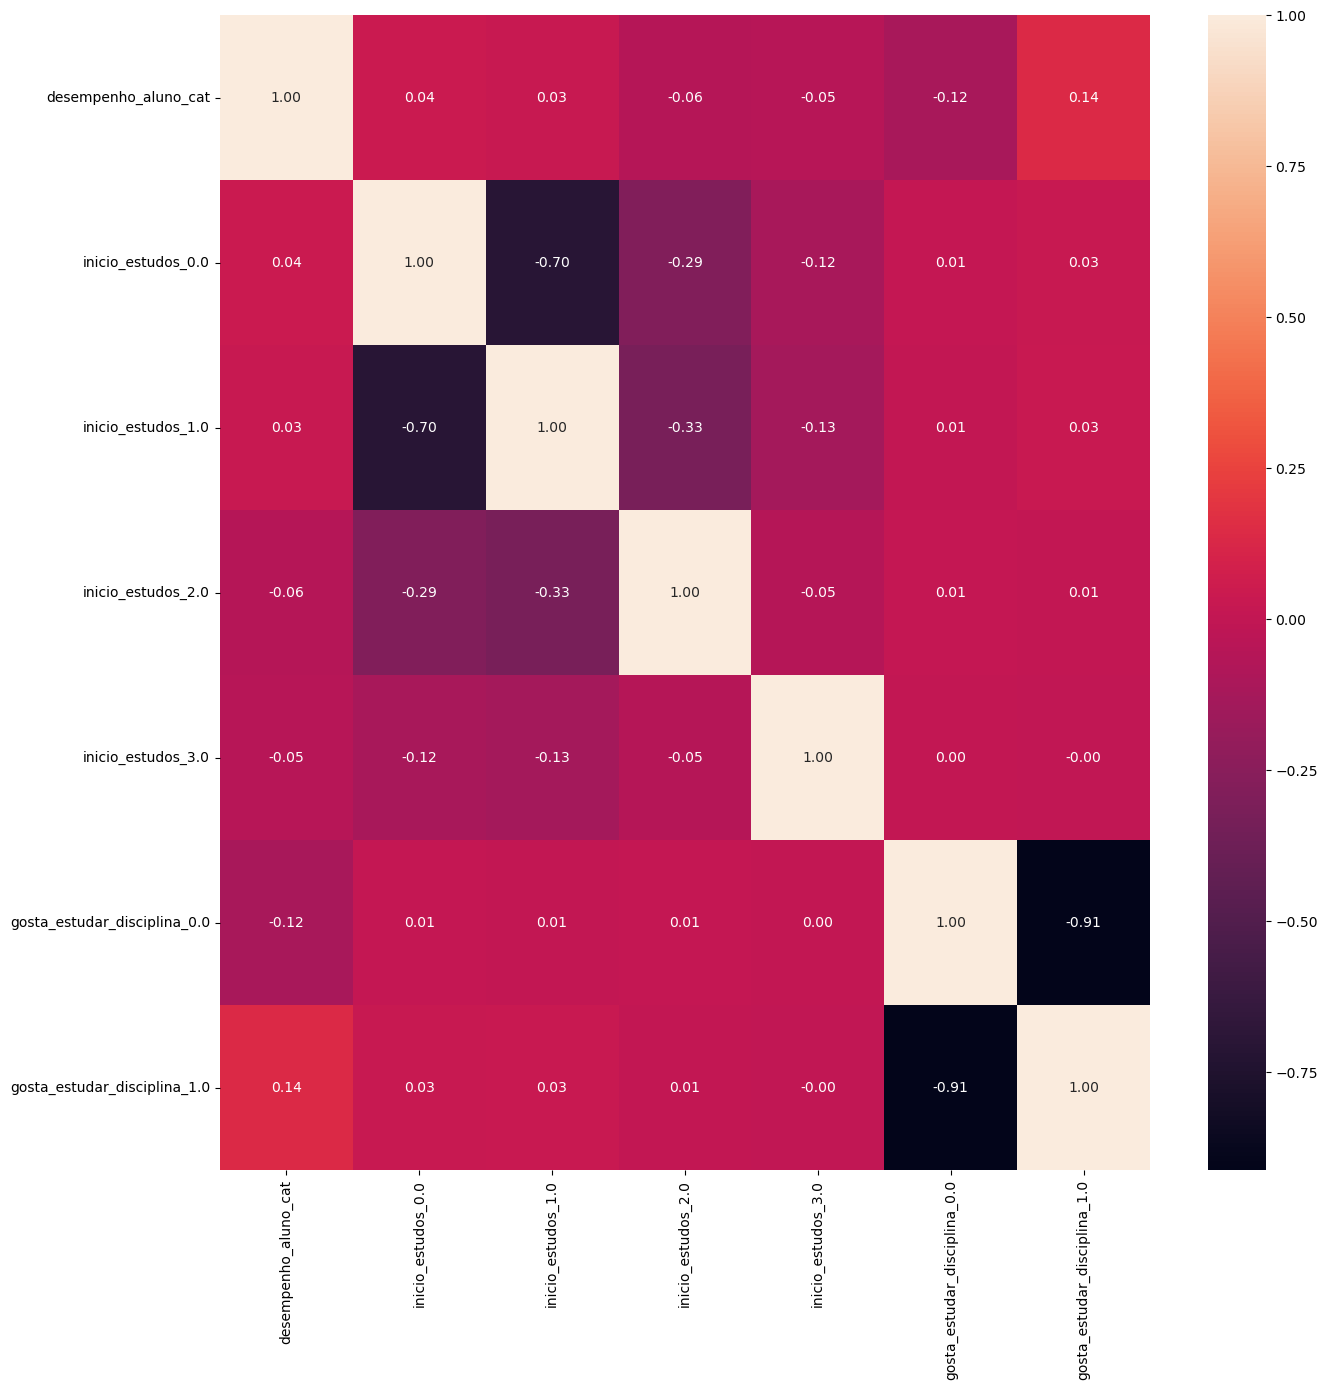

In [38]:
# inicio estudos + gosta estudar disciplina

columns_oi = [col for col in df.columns if 'inicio_estudos' in col] + ['gosta_estudar_disciplina'] + ['desempenho_aluno_cat']

df_inicio = df[columns_oi]

df_inicio = pd.get_dummies(df_inicio, columns=[col for col in df_inicio.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_inicio.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

In [39]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'licao' in col]
exclude += [col for col in df.columns if 'tempo' in col]
exclude += [col for col in df.columns if 'frequenta' in col]
exclude += ['utiliza_biblioteca_escola']
exclude += [col for col in df.columns if 'escolaridade_' in col]
exclude += ['mae_le', 'pai_le', 'mae_sabe_ler_escrever', 'pai_sabe_ler_escrever']
exclude += [col for col in df.columns if 'possui' in col]
exclude += [col for col in df.columns if 'inicio_estudos' in col]
exclude += ['gosta_estudar_disciplina']

columns_oi = [col for col in df.columns if col not in exclude]

colunas_restantes = columns_oi
print(colunas_restantes)

['pretensao_futura', 'reprovacao', 'evasao_escolar_ate_final_ano', 'idade', 'desempenho_aluno_cat']


<AxesSubplot: >

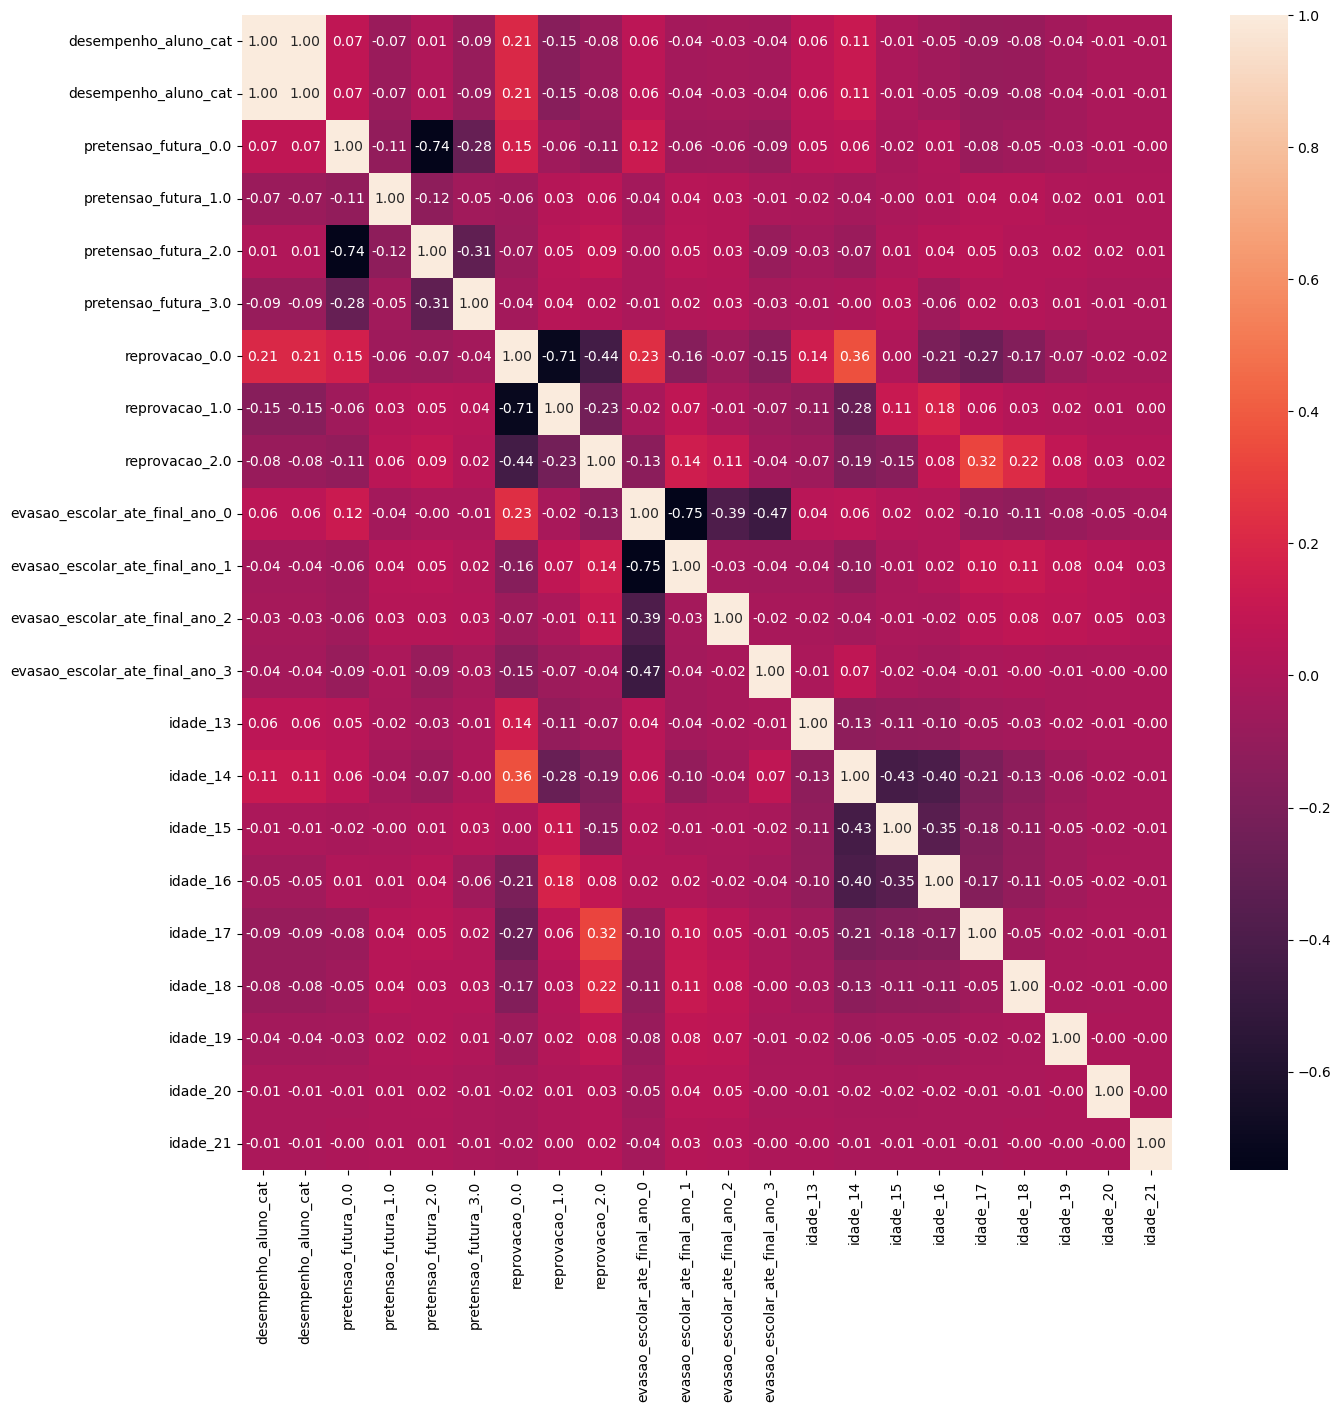

In [40]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'licao' in col]
exclude += [col for col in df.columns if 'tempo' in col]
exclude += [col for col in df.columns if 'frequenta' in col]
exclude += ['utiliza_biblioteca_escola']
exclude += [col for col in df.columns if 'escolaridade_' in col]
exclude += ['mae_le', 'pai_le', 'mae_sabe_ler_escrever', 'pai_sabe_ler_escrever']
exclude += [col for col in df.columns if 'possui' in col]
exclude += [col for col in df.columns if 'inicio_estudos' in col]
exclude += ['gosta_estudar_disciplina']

columns_oi = [col for col in df.columns if col not in exclude] + ['desempenho_aluno_cat']

df_geral = df[columns_oi]

df_geral = pd.get_dummies(df_geral, columns=[col for col in df_geral.columns if col != 'desempenho_aluno_cat'])

# visualizando correlação com matriz de confusão
correlation = df_geral.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

<AxesSubplot: >

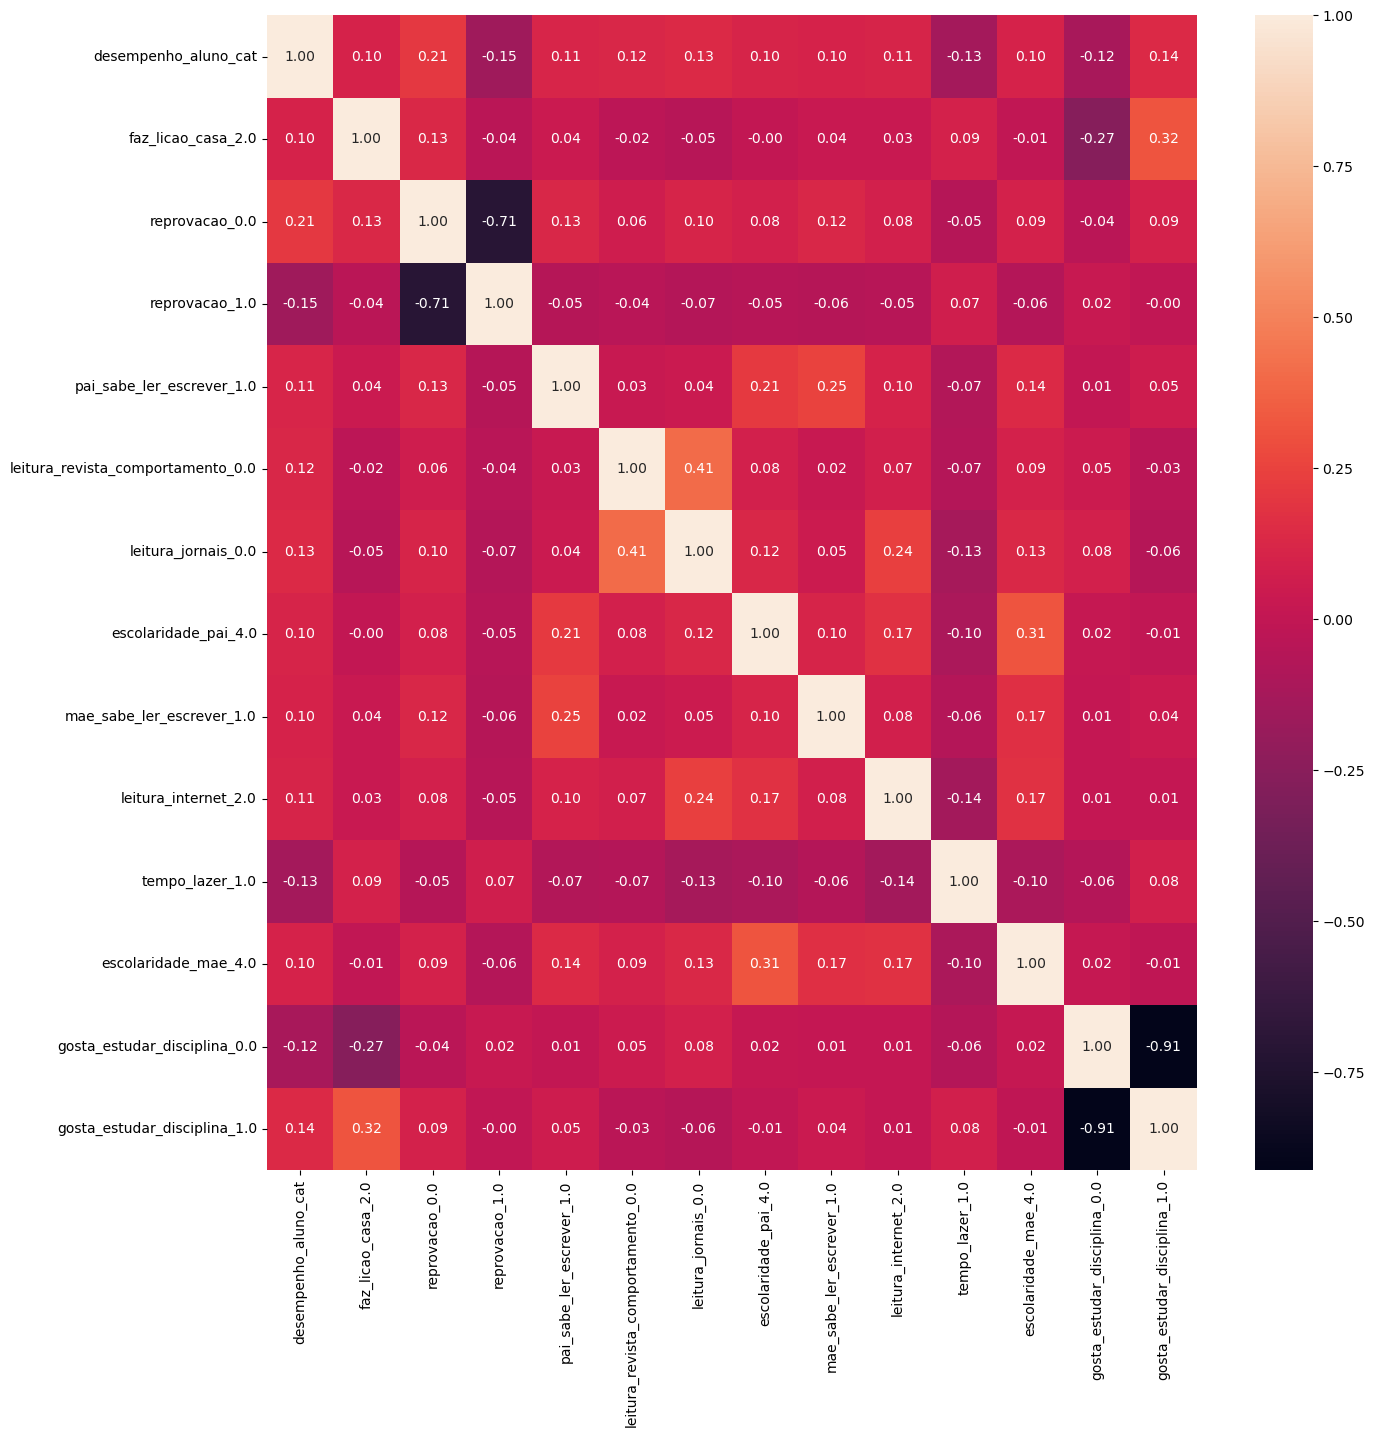

In [41]:
# aplicando dummies para cada coluna restante + colunas de interesse anteriores
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'idade',
       'desempenho_aluno']

columns_oi = [col for col in df.columns if col not in exclude]

df_restantes = df[columns_oi]

df_restantes = pd.get_dummies(df_restantes, columns=[col for col in df_restantes.columns if col != 'desempenho_aluno_cat'])

# removendo colunas de correlação próxima a 0 (em relação a desempenho_aluno_cat)

correlation = df_restantes.corr()
correlation = correlation['desempenho_aluno_cat']
correlation = correlation[correlation < 0.1]
correlation = correlation[correlation > -0.1]

df_restantes = df_restantes.drop(columns=correlation.index)

df_restantes['desempenho_aluno_cat'] = df['desempenho_aluno_cat']
df_restantes['desempenho_aluno'] = df['desempenho_aluno']
df_restantes['id_aluno'] = df['id_aluno']
df_restantes['disciplina'] = df['disciplina']
df_restantes['proficiencia'] = df['proficiencia']
df_restantes['erro_padrao'] = df['erro_padrao']

# visualizando correlação com matriz de confusão
correlation = df_restantes.drop(columns=['desempenho_aluno', 'id_aluno', 'disciplina', 'proficiencia', 'erro_padrao']).corr()

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

In [42]:
# save df_restantes to file

save = True
if save:
    df_restantes.to_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_fe.pkl'))